In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture

In [4]:
mush = pd.read_csv('../../Lab1/Heenal/Data/mushroom_new.csv')

In [7]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [31]:
X = mush[['gill-color', 'gill-spacing']]

In [32]:
y = mush['class']

In [33]:
y.shape

(8124,)

In [34]:
mush['class'].unique()

array([1, 0])

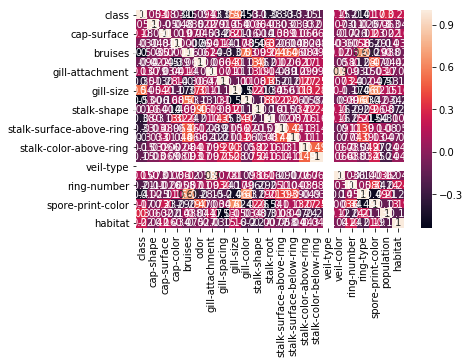

In [12]:
sns.heatmap(mush.corr(), annot=True)

In [14]:
gmm = GaussianMixture(n_components=2)

In [36]:
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [37]:
labels = gmm.predict(X)

In [38]:
X['labels'] = labels
x0 = X[X['labels'] == 0]
x1 = X[X['labels'] == 1]

/home/heenal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
x0.shape

(1312, 3)

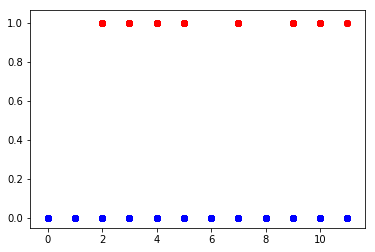

In [41]:
plt.scatter(x0['gill-color'], x0['gill-spacing'], c='r')
plt.scatter(x1['gill-color'], x1['gill-spacing'], c='b')